In [3]:
import import_ipynb
import preprocess_model

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
# Load the data from the CSV file
df = pd.read_csv('./data/new_data_asia.csv')

In [18]:
numerical_features = ['School enrollment, primary', 'School enrollment, tertiary', 'Primary completion rate', 'Year']
categorical_features = ['Country']
target = 'Literacy rate'

# Drop rows with missing target values
df.dropna(subset=[target], inplace=True)

      School enrollment, primary  School enrollment, tertiary   
0                     100.911263                    28.845509  \
1                     100.911263                    28.845509   
2                     100.911263                    10.858440   
3                     110.007507                    28.845509   
4                     107.780533                     9.963790   
...                          ...                          ...   
1311                   66.228958                     9.482180   
1312                  100.911263                    28.845509   
1313                  100.911263                     4.160940   
1314                  100.911263                    28.845509   
1315                  100.911263                    28.845509   

      Primary completion rate  Year      Country  
0                   96.636715  2022  Afghanistan  
1                   96.636715  2021  Afghanistan  
2                   96.636715  2020  Afghanistan  
3              

In [7]:
# X_train, X_temp, y_train, y_temp = train_test_split(df[numerical_features + categorical_features], df[target], test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Standardize the numerical features
# scaler = StandardScaler()
# X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
# X_val[numerical_features] = scaler.transform(X_val[numerical_features])
# X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# # Preprocess categorical features
# label_encoders = {}
# for cat_feature in categorical_features:
#     le = LabelEncoder()
#     X_train[cat_feature] = le.fit_transform(X_train[cat_feature])
#     X_val[cat_feature] = le.transform(X_val[cat_feature])
#     X_test[cat_feature] = le.transform(X_test[cat_feature])
#     label_encoders[cat_feature] = le

# # Train a Linear Regression model
# linear_reg_model = LinearRegression()
# linear_reg_model.fit(X_train, y_train)

# # Make predictions on the validation set
# predictions_val = linear_reg_model.predict(X_val)

# # Evaluate the model on the validation set
# val_mse = mean_squared_error(y_val, predictions_val)
# print(f'Validation Mean Squared Error: {val_mse}')

# # Plot actual vs. predicted values on the validation set
# plt.scatter(y_val, predictions_val)
# plt.xlabel('Actual Literacy rate (Validation)')
# plt.ylabel('Predicted Literacy rate (Validation)')
# plt.title('Actual vs. Predicted Literacy rate (Linear Regression - Validation)')
# plt.show()

# # Now, you can use the trained Linear Regression model for predictions on the test set.
# # Make predictions on the test set
# predictions_test = linear_reg_model.predict(X_test)

# # Evaluate the model on the test set
# test_mse = mean_squared_error(y_test, predictions_test)
# print(f'Test Mean Squared Error: {test_mse}')

# # Plot actual vs. predicted values on the test set
# plt.scatter(y_test, predictions_test)
# plt.xlabel('Actual Literacy rate (Test)')
# plt.ylabel('Predicted Literacy rate (Test)')
# plt.title('Actual vs. Predicted Literacy rate (Linear Regression - Test)')
# plt.show()

In [8]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(df[numerical_features + categorical_features], df[target], test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Shapes after splitting:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)


Shapes after splitting:
X_train: (789, 5) y_train: (789,)
X_val: (263, 5) y_val: (263,)
X_test: (264, 5) y_test: (264,)


In [9]:

# Standardize the numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [10]:

# Preprocess categorical features
label_encoders = {}
for cat_feature in categorical_features:
    le = LabelEncoder()
    X_train[cat_feature] = le.fit_transform(X_train[cat_feature])
    X_val[cat_feature] = le.transform(X_val[cat_feature])
    X_test[cat_feature] = le.transform(X_test[cat_feature])
    label_encoders[cat_feature] = le

# Define the learning rate
learning_rate = 0.0001  


Epoch 1/200



13/13 [==============================] - 3s 44ms/step - loss: 9404.6934 - val_loss: 9119.7656
Epoch 2/200
13/13 [==============================] - 0s 12ms/step - loss: 8412.5225 - val_loss: 7140.8940
Epoch 3/200
13/13 [==============================] - 0s 12ms/step - loss: 5028.9678 - val_loss: 2125.1882
Epoch 4/200
13/13 [==============================] - 0s 12ms/step - loss: 1661.4933 - val_loss: 1074.8281
Epoch 5/200
13/13 [==============================] - 0s 11ms/step - loss: 1122.0339 - val_loss: 768.5629
Epoch 6/200
13/13 [==============================] - 0s 11ms/step - loss: 754.2378 - val_loss: 412.2427
Epoch 7/200
13/13 [==============================] - 0s 11ms/step - loss: 540.7723 - val_loss: 327.5291
Epoch 8/200
13/13 [==============================] - 0s 14ms/step - loss: 457.8854 - val_loss: 221.3110
Epoch 9/200
13/13 [==============================] - 0s 14ms/step - loss: 373.1906 - val_loss: 196.8196
Epoch 10/200
13/13 [==============================] - 0s 11ms/step 

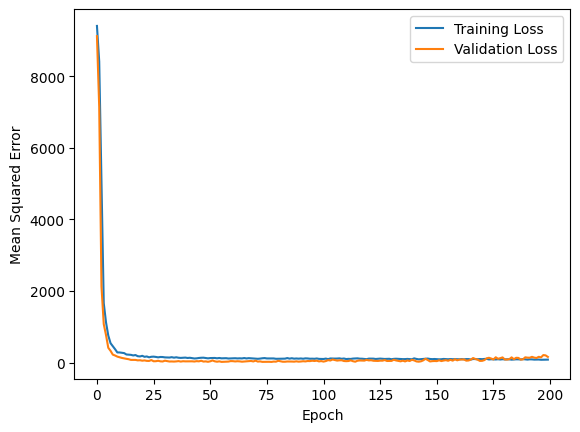

In [11]:

# Define the model
input_layers = []
embedding_layers = []

for cat_feature in categorical_features:
    input_layer = Input(shape=(1,), name=cat_feature)
    embedding_layer = Embedding(input_dim=len(df[cat_feature].unique()), output_dim=10)(input_layer)
    flatten_layer = Flatten()(embedding_layer)
    input_layers.append(input_layer)
    embedding_layers.append(flatten_layer)

numerical_input = Input(shape=(len(numerical_features),), name='numerical_input')
embedding_layers.append(numerical_input)

# Concatenate all input layers
concatenated = Concatenate()(embedding_layers)

# Fully connected layers with dropout for regularization
x = Dense(256, activation='relu')(concatenated)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(1, activation='linear', name='output')(x)

# Model
model = Model(inputs=input_layers + [numerical_input], outputs=output_layer)

# Compile the model with Mean Squared Error loss and the specified learning rate
model.compile(optimizer=Adam(lr=learning_rate), loss='mean_squared_error')

# Train the model for more epochs
history = model.fit([X_train[cat_feature] for cat_feature in categorical_features] + [X_train[numerical_features]],
                    y_train, epochs=200, batch_size=64,
                    validation_data=([X_val[cat_feature] for cat_feature in categorical_features] + [X_val[numerical_features]], y_val),
                    verbose=1)

# Evaluate the model on the test set
test_loss = model.evaluate([X_test[cat_feature] for cat_feature in categorical_features] + [X_test[numerical_features]], y_test)
print(f'Test Loss: {test_loss}')

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

9/9 [==============================] - 0s 2ms/step
993     98.709351
224     98.709351
342     99.668808
855     98.709351
58      98.709351
          ...    
1252    98.709351
842     98.709351
5       98.709351
381     97.431534
944     98.709351
Name: Literacy rate, Length: 264, dtype: float64
[[85.48597 ]
 [88.3343  ]
 [88.85857 ]
 [86.09916 ]
 [88.064964]
 [84.95408 ]
 [89.52119 ]
 [87.42156 ]
 [87.2643  ]
 [89.704636]
 [87.971245]
 [86.78983 ]
 [87.520485]
 [87.83596 ]
 [89.36834 ]
 [84.86054 ]
 [88.556496]
 [89.42893 ]
 [87.55807 ]
 [85.15797 ]
 [83.81159 ]
 [84.864746]
 [88.34637 ]
 [87.22422 ]
 [86.29716 ]
 [86.66157 ]
 [86.16102 ]
 [88.34557 ]
 [85.010605]
 [84.861206]
 [88.55973 ]
 [88.34344 ]
 [86.73658 ]
 [88.06861 ]
 [87.74253 ]
 [85.33346 ]
 [87.21156 ]
 [87.787   ]
 [88.38484 ]
 [89.950226]
 [86.67516 ]
 [87.50837 ]
 [86.83233 ]
 [86.38771 ]
 [87.645615]
 [85.959366]
 [86.26511 ]
 [87.51087 ]
 [87.802605]
 [83.90155 ]
 [87.72915 ]
 [80.63467 ]
 [84.7187  ]
 [86.86762 ]


C:\Users\TIN\AppData\Local\Temp\ipykernel_9384\2899457741.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True)
C:\Users\TIN\AppData\Local\Temp\ipykernel_9384\2899457741.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(predictions.flatten(), label='Predicted', shade=True)


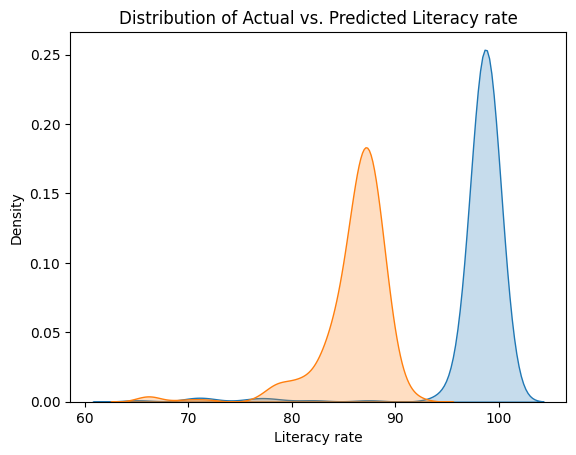

Mean Squared Error: 154.53773381940843
Mean Absolute Error: 12.036988749648586
R-squared: -6.977607804078561


In [37]:
# Make predictions
# test = ['School enrollment, primary', 'School enrollment, tertiary', 'Primary completion rate', 'Year', 'Country']
# print(df[test])
# new_data = pd.DataFrame({
#     'School enrollment, primary': [100.911263,100.911262512207],
#     'School enrollment, tertiary': [28.845509  ,28.8455085754395],
#     'Primary completion rate': [96.636715, 96.63671493530276],
#     'Year': [2023,2023],
#     'Country': ["Afghanistan", "Japan"],
#     # other columns as needed
# })
# 100.911262512207,28.8455085754395,96.63671493530276
# # Preprocess the new data similar to the training data
# # Standardize numerical features
# new_data[numerical_features] = scaler.transform(new_data[numerical_features])

# # Preprocess categorical features
# for cat_feature in categorical_features:
#     new_data[cat_feature] = label_encoders[cat_feature].transform(new_data[cat_feature])

# # Make predictions on the new data
# predictions_future = model.predict([new_data[cat_feature] for cat_feature in categorical_features] + [new_data[numerical_features]])
# print(predictions_future)
predictions = model.predict([X_test[cat_feature] for cat_feature in categorical_features] + [X_test[numerical_features]])
print(y_test)
print(predictions)
import seaborn as sns

sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(predictions.flatten(), label='Predicted', shade=True)
plt.xlabel('Literacy rate')
plt.title('Distribution of Actual vs. Predicted Literacy rate')
plt.show()
residuals = y_test - predictions.flatten()

# plt.scatter(y_test, residuals)
# plt.axhline(y=0, color='red', linestyle='--')
# plt.xlabel('Actual Literacy rate')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
